In [1]:
from helper import Helper
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from time import time

In [2]:
h = Helper()

In [3]:
train_it, validation_it, test_it = h.construct_data_generator(validation_split=0.1)

Found 22680 images belonging to 3 classes.
Found 2520 images belonging to 3 classes.
Found 6300 images belonging to 3 classes.


data/train/017197.png


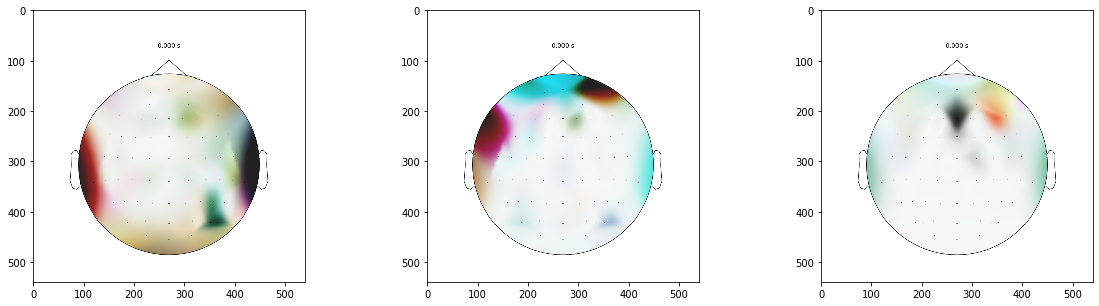

In [4]:
h.plot_examples()

In [5]:
def build_model(optimizer, loss, name):
    model = Sequential(name=name)
    
    model.add(Conv2D(16, (5,5), padding = 'same', input_shape = (224, 224, 3), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (1,1), strides = (2,2)))
    model.add(Conv2D(32, (5,5), padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (1,1), strides =(2,2)))
    model.add(Conv2D(64, (5,5), padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (1,1), strides =(2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation = 'softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    model.summary()
    
    return model

In [6]:
opt = Adam(learning_rate=0.0001)
loss = 'categorical_crossentropy'

In [7]:
tblog_path = h.logs_directory.format(time())
tb_log = TensorBoard(log_dir = tblog_path)

In [8]:
model = build_model(opt, loss, 'cnn_topomap_classification_model')

Model: "cnn_topomap_classification_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None

In [9]:
r = model.fit_generator(train_it, epochs=80, callbacks=[tb_log])

Epoch 1/80
178/178 [==============================] - 87s 491ms/step - loss: 1.0553 - accuracy: 0.4327
Epoch 2/80
178/178 [==============================] - 87s 489ms/step - loss: 0.9000 - accuracy: 0.5644
Epoch 3/80
178/178 [==============================] - 87s 488ms/step - loss: 0.7725 - accuracy: 0.6453
Epoch 4/80
178/178 [==============================] - 87s 488ms/step - loss: 0.6819 - accuracy: 0.6958
Epoch 5/80
178/178 [==============================] - 87s 490ms/step - loss: 0.6189 - accuracy: 0.7285
Epoch 6/80
178/178 [==============================] - 87s 489ms/step - loss: 0.5802 - accuracy: 0.7458
Epoch 7/80
178/178 [==============================] - 87s 489ms/step - loss: 0.5414 - accuracy: 0.7662
Epoch 8/80
178/178 [==============================] - 87s 489ms/step - loss: 0.5187 - accuracy: 0.7779
Epoch 9/80
178/178 [==============================] - 87s 489ms/step - loss: 0.4910 - accuracy: 0.7872
Epoch 10/80
178/178 [==============================] - 87s 488ms/step - l

178/178 [==============================] - 87s 488ms/step - loss: 0.1578 - accuracy: 0.9363
Epoch 80/80
178/178 [==============================] - 87s 486ms/step - loss: 0.1603 - accuracy: 0.9359


In [12]:
evaluate = model.evaluate_generator(train_it)

In [13]:
h.save(model, evaluate, 'cnn_topomap_classification_model')

model saved, path: models/cnn_topomap_classification_model.h5
